In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean

In [4]:
n=5 #nbre de boules noires
#la matrice de transition K
K=np.diag([(i/n)**2 for i in range(1,n+1)],-1)+np.diag([2*i*(n-i)/n**2 for i in range(n+1)])+np.diag([((n-i)/n)**2 for i in range(0,n)],1)
[sum(K[k,:]) for k in range (n)]

[1.0, 1.0, 1.0, 1.0, 1.0000000000000002]

In [5]:
K

array([[0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.04, 0.32, 0.64, 0.  , 0.  , 0.  ],
       [0.  , 0.16, 0.48, 0.36, 0.  , 0.  ],
       [0.  , 0.  , 0.36, 0.48, 0.16, 0.  ],
       [0.  , 0.  , 0.  , 0.64, 0.32, 0.04],
       [0.  , 0.  , 0.  , 0.  , 1.  , 0.  ]])

In [6]:
#Trajectoire de longueur m
def traj(m,M,X0):
    X=[X0]
    for k in range (0,m):
        X.append(np.random.choice(range(n+1),p=M[X[k],:]))
    return X

Text(0.5, 0, 'Après i tirage')

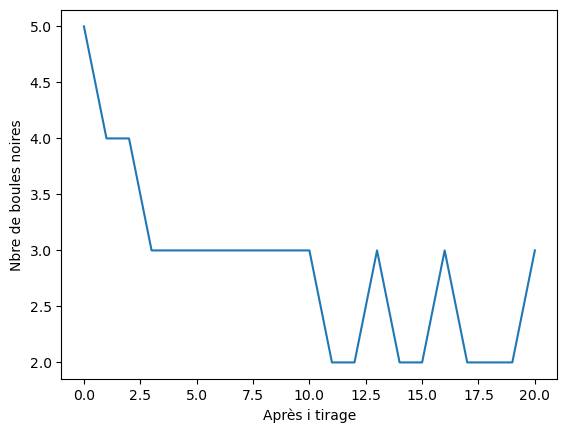

In [9]:
X0=5
m=20
plt.plot(np.arange(m+1),traj(m,K,X0))
plt.ylabel('Nbre de boules noires')
plt.xlabel('Après i tirage')

(array([  379.,     0.,  9919.,     0., 39819.,     0., 39705.,     0.,
         9791.,   388.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

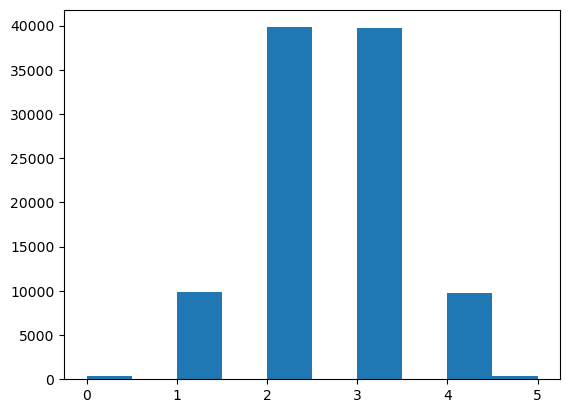

In [12]:
X0=5
m=100000
T=traj(m,K,X0)
plt.hist(T)

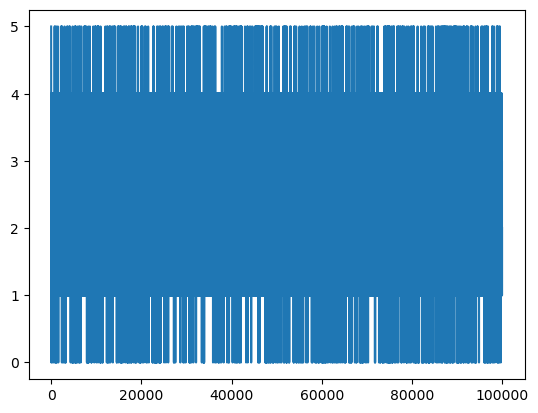

In [13]:
plt.plot(np.arange(m+1),T)

In [14]:
#Une approximation de π_k pour les différentes valeurs de k
def Pi(k):
    pi=0
    for i in range (1,m+1):
        if T[i]==k:
            pi+=1
    pi=pi/m        
    return pi

In [15]:
print ( 'Pour k=0:', Pi(0))
print ( 'Pour k=1:', Pi(1))
print ( 'Pour k=2:', Pi(2))
print ( 'Pour k=3:', Pi(3))
print ( 'Pour k=4:', Pi(4))
print ( 'Pour k=5:', Pi(5))

Pour k=0: 0.00379
Pour k=1: 0.09919
Pour k=2: 0.39819
Pour k=3: 0.39705
Pour k=4: 0.09791
Pour k=5: 0.00387


In [16]:
sum([Pi(i) for i in range (6)])

1.0

Text(0, 0.5, 'Nbre moyen de bouls noires dans $U_2$')

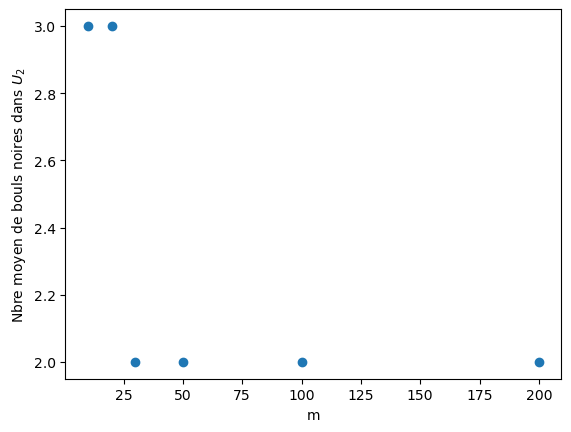

In [18]:
#l'évolution du nombre moyen de boules noires dans l'urne U_2
nbreMoy=[mean(traj(m,K,X0)) for m in [10,20,30,50,100,200]]
plt.plot([10,20,30,50,100,200],nbreMoy,'o')
plt.xlabel('m')
plt.ylabel('Nbre moyen de bouls noires dans $U_2$')